In [122]:
from Bio import SeqIO
for record in SeqIO.parse("pdb/6dwb.pdb", "pdb-seqres"):
    print("Record id %s, chain %s" % (record.id, record.annotations["chain"]))
    print(record.dbxrefs)
len(record.seq)

Record id 6DWB:A, chain A
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:B, chain B
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:C, chain C
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:D, chain D
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:E, chain E
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:F, chain F
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:G, chain G
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:H, chain H
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:I, chain I
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:J, chain J
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:K, chain K
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:L, chain L
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:M, chain M
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:N, chain N
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:O, chain O
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:P, chain P
['UNP:P41784', 'UNP:PRGI_SALTY']
Record id 6DWB:Q, chain Q
['UNP:P41784', 'UNP:PRGI_SALTY

80

In [135]:
for chain in list(myProtein.get_chains()):
    chain = myProtein[0][chain.id]
    residues = list(chain.get_residues())

[<Residue THR het=  resseq=3 icode= >, <Residue PRO het=  resseq=4 icode= >, <Residue TRP het=  resseq=5 icode= >, <Residue SER het=  resseq=6 icode= >, <Residue GLY het=  resseq=7 icode= >, <Residue TYR het=  resseq=8 icode= >, <Residue LEU het=  resseq=9 icode= >, <Residue ASP het=  resseq=10 icode= >, <Residue ASP het=  resseq=11 icode= >, <Residue VAL het=  resseq=12 icode= >, <Residue SER het=  resseq=13 icode= >, <Residue ALA het=  resseq=14 icode= >, <Residue LYS het=  resseq=15 icode= >, <Residue PHE het=  resseq=16 icode= >, <Residue ASP het=  resseq=17 icode= >, <Residue THR het=  resseq=18 icode= >, <Residue GLY het=  resseq=19 icode= >, <Residue VAL het=  resseq=20 icode= >, <Residue ASP het=  resseq=21 icode= >, <Residue ASN het=  resseq=22 icode= >, <Residue LEU het=  resseq=23 icode= >, <Residue GLN het=  resseq=24 icode= >, <Residue THR het=  resseq=25 icode= >, <Residue GLN het=  resseq=26 icode= >, <Residue VAL het=  resseq=27 icode= >, <Residue THR het=  resseq=28 ic

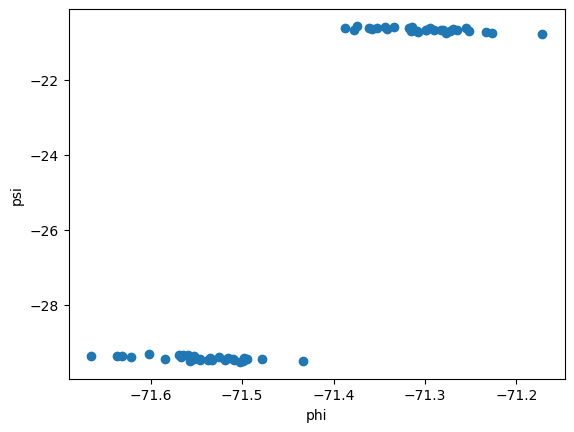

In [137]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Chain import Chain
from Bio.PDB.internal_coords import *
from Bio.PDB.PICIO import write_PIC, read_PIC, read_PIC_seq
from Bio.PDB.ic_rebuild import write_PDB, IC_duplicate, structure_rebuild_test
from Bio.PDB.SCADIO import write_SCAD
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.PDB.PDBIO import PDBIO
import numpy as np

# load a structure as normal, get first chain
parser = PDBParser()
myProtein = parser.get_structure("6dwb", "pdb/6dwb.pdb")

phi_psi_dict = {}

for chain in list(myProtein.get_chains()):
    chain = myProtein[0][chain.id]
    chain.atom_to_internal_coordinates(verbose=False)
    residues = list(chain.get_residues())
    for i in range(1,len(residues)-1):
        psi = residues[i].internal_coord.get_angle("psi")
        phi = residues[i].internal_coord.get_angle("phi")
        key = (residues[i-1].resname, residues[i].resname, residues[i+1].resname)
        if key not in phi_psi_dict:
            phi_psi_dict[key] = ([phi], [psi])
        else:
            phi_psi_dict[key][0].append(phi)
            phi_psi_dict[key][1].append(psi)

import matplotlib.pyplot as plt
import numpy as np

key = ('LEU', 'ALA', 'ALA')
x = phi_psi_dict[key][0]
y = phi_psi_dict[key][1]

plt.scatter(x, y)
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()